The purpose of this notebook is to predict if a review from IMDB (Internet Movie Database) is positive (1) or negative (0), determining the sentimental analysis or the attitude of the writer, through binary classification with Keras and the IMDB dataset.

In [1]:
from keras.datasets import imdb # imdb dataset

from keras import models
from keras import layers

from keras.preprocessing.text import Tokenizer # text processing

import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra, arrays

Using TensorFlow backend.


Set top frequent words limit in 2000

In [2]:
top_freq_words = 2000

Loading imdb dataset

In [3]:
(train_features, train_labels), (test_features, test_labels) = imdb.load_data(num_words=top_freq_words)

**Data evaluation**

In [4]:
print('Train features: {0}'.format(len(train_features)))
print('Test features: {0}'.format(len(test_features)))

Train features: 25000
Test features: 25000


In [5]:
print('Number of unique words: {0}'.format(max([max(words) for words in train_features])+1))
print('Number of categories: {0}'.format(max(train_labels)+1))

Number of unique words: 2000
Number of categories: 2


In [6]:
print('Train features sample: {0}'.format(train_features[0]))
print('Train labels sample: {0}'.format(train_labels[0]))

Train features sample: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Train labels sample: 1


To decode the train sample is required the word index

In [7]:
word_index = imdb.get_word_index()

Decoding of train sample with unknown words showed as '?'

In [8]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_train_sample = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_features[0]])
print('Decoded train sample: {0}'.format(decoded_train_sample))

Decoded train sample: ? this film was just brilliant casting location scenery story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? island as myself so i loved the fact there was a real ? with this film the witty ? throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so lovely because it was tru

**Data preparation**

In [9]:
tokenizer = Tokenizer(num_words=top_freq_words)
tokenizer.fit_on_sequences(train_features)
train_features_b = tokenizer.sequences_to_matrix(train_features, mode='binary')
test_features_b = tokenizer.sequences_to_matrix(test_features, mode='binary')

In [10]:
train_labels_b = np.asarray(train_labels).astype('float32')
test_labels_b = np.asarray(test_labels).astype('float32')

Build a sequential model with a method that can be reused

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(24, activation='relu', input_shape=(top_freq_words,)))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [12]:
model = build_model()

Split train features to create validation dataset (25%)

In [13]:
from sklearn.model_selection import train_test_split

(partial_train_feat,val_feat,partial_train_lab,val_lab) = train_test_split(train_features_b, 
                                                                           train_labels_b, 
                                                                           test_size = 0.25, 
                                                                           random_state = 4)

Training the model for 10 epochs or passes over the entire dataset

In [14]:
history = model.fit(partial_train_feat,
                    partial_train_lab,
                    epochs=10,
                    batch_size=512,
                    validation_data=(val_feat, val_lab))

Train on 18750 samples, validate on 6250 samples
Epoch 1/10
18750/18750 [==============================] - 1s 31us/step - loss: 0.4954 - acc: 0.7831 - val_loss: 0.3842 - val_acc: 0.8475
Epoch 2/10
18750/18750 [==============================] - 0s 25us/step - loss: 0.3334 - acc: 0.8698 - val_loss: 0.3311 - val_acc: 0.8669
Epoch 3/10
18750/18750 [==============================] - 0s 22us/step - loss: 0.2892 - acc: 0.8845 - val_loss: 0.3052 - val_acc: 0.8739
Epoch 4/10
18750/18750 [==============================] - 0s 20us/step - loss: 0.2669 - acc: 0.8931 - val_loss: 0.3007 - val_acc: 0.8734
Epoch 5/10
18750/18750 [==============================] - 0s 23us/step - loss: 0.2501 - acc: 0.9000 - val_loss: 0.3432 - val_acc: 0.8627
Epoch 6/10
18750/18750 [==============================] - 0s 19us/step - loss: 0.2388 - acc: 0.9054 - val_loss: 0.3042 - val_acc: 0.8738
Epoch 7/10
18750/18750 [==============================] - 0s 20us/step - loss: 0.2293 - acc: 0.9092 - val_loss: 0.3100 - val_acc:

Plotting training and validation loss

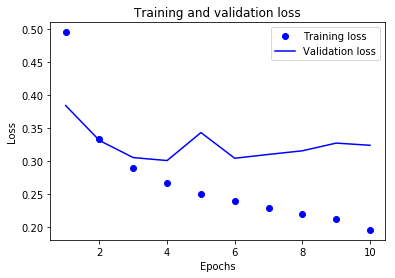

In [15]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting training and validation accuracy

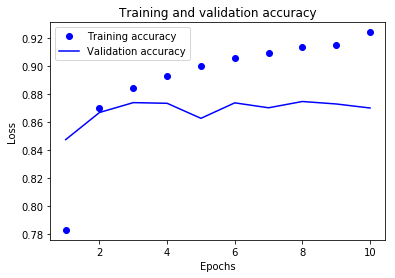

In [16]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfit starts after 4 epochs

Rebuild and retrain the model from scratch for 4 epochs to avoid overfit. Note that validation set is not used for this time

In [17]:
model = build_model()

In [18]:
model.fit(train_features_b, train_labels_b, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 1s 32us/step - loss: 0.4654 - acc: 0.7970
Epoch 2/4
25000/25000 [==============================] - 1s 22us/step - loss: 0.3113 - acc: 0.8751
Epoch 3/4
25000/25000 [==============================] - 1s 22us/step - loss: 0.2795 - acc: 0.8878
Epoch 4/4
25000/25000 [==============================] - 0s 19us/step - loss: 0.2625 - acc: 0.8959


Model evaluation

In [19]:
final_loss, final_acc = model.evaluate(test_features_b, test_labels_b)

25000/25000 [==============================] - 1s 34us/step


Final results

In [20]:
print('Final loss: {0}'.format(final_loss))
print('Final accuracy: {0}'.format(final_acc))

Final loss: 0.3120620000076294
Final accuracy: 0.87252
